In [5]:
# import libraries
%matplotlib inline
import pandas as pd
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [6]:
# Download MNIST datasets 
# This datasets include 2 tapples. x_train, x_test(28,28) and y_train, y_test(9 classes).
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 3s 0us/step


None


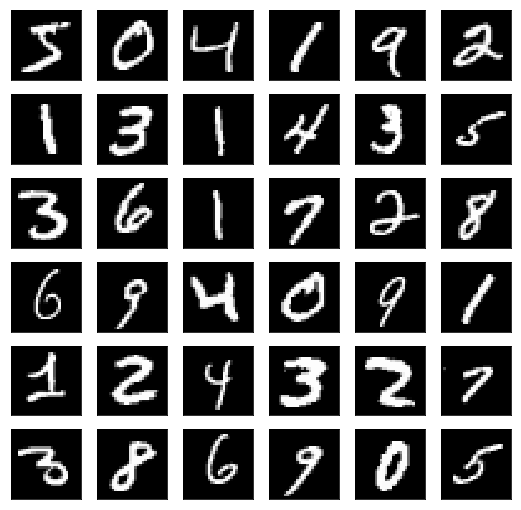

In [16]:
# show sample data
fig = plt.figure(figsize=(9,9))
print(fig.get_contains())
for i in range(36):
    ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap='gist_gray')


In [10]:
print(x_train.shape)

(60000, 28, 28)


In [18]:
# reshape 28*28 pixel data into 784 dim data
# convert into float type and normalize pixel data from 0.0 to 1.0
x_train = x_train.reshape(60000, 784).astype('float32') /255
x_test = x_test.reshape(10000, 784).astype('float32') /255

# encode label data into "one-hot" 
y_train = keras.utils.np_utils.to_categorical(y_train.astype('int32'),10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype('int32'),10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 276us/step - loss: 0.3394 - acc: 0.8959 - val_loss: 0.1565 - val_acc: 0.9511
Epoch 2/20
60000/60000 [==============================] - 17s 292us/step - loss: 0.1951 - acc: 0.9426 - val_loss: 0.1568 - val_acc: 0.9569
Epoch 3/20
60000/60000 [==============================] - 16s 263us/step - loss: 0.1835 - acc: 0.9500 - val_loss: 0.1246 - val_acc: 0.9640
Epoch 4/20
60000/60000 [==============================] - 15s 244us/step - loss: 0.1888 - acc: 0.9530 - val_loss: 0.1434 - val_acc: 0.9618
Epoch 5/20
60000/60000 [==============================] - 16s 274us/step - loss: 0.1880 - acc: 0.9549 - val_loss: 0.1441 - val_acc: 0.9686
Epoch 6/20
60000/60000 [==============================] - 15s 246us/step - loss: 0.2068 - acc: 0.9558 - val_loss: 0.1558 - val_acc: 0.9696
Epoch 7/20
60000/60000 [==============================] - 15s 242us/step - loss: 0.2074 - acc: 0.9584 - val_loss: 0.

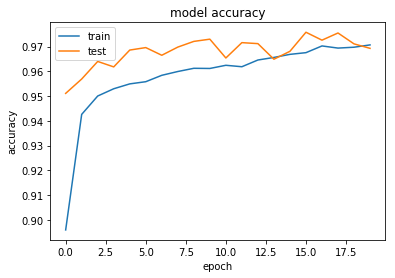

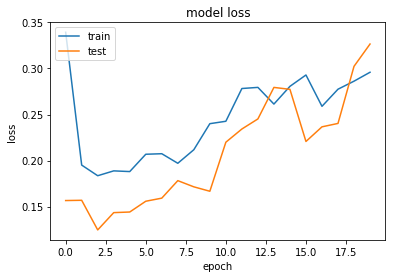

In [19]:
# Sequential Model

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop


# select Sequiential model
model = Sequential()

# 1st layer : fully connected layer(output:512)
# acrivation methods: ReLU(rectified linear unit)
# only first layer needs to be define input_shape
model.add(Dense(512, activation='relu', input_shape=(784,)))

# use Dropout regularization rate to avoid overfitting
# Randomly ignoring connections between layers 
model.add(Dropout(0.2))

# 2st layer : fully connected layer(output:512)
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

# 3st layer : fully connected layer(output:10)
# acrivation methods: softmax, which squashes the outputs of each unit to be between 0 and 1.(often used in the final layer)
model.add(Dense(10, activation='softmax'))

# Set definitions for traning
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Excute training for 20(epochs) times
history = model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

# plot the resulut
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()